In [215]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [216]:
train = pd.read_csv('C:\\Users\\jemmy\\Desktop\\data\\Demo_Datasets\\Lesson 4\\bigmart_train.csv')
test = pd.read_csv('C:\\Users\\jemmy\Desktop\\data\\Demo_Datasets\\Lesson 4\\bigmart_test.csv')

In [217]:
train.shape

(8523, 12)

In [218]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [219]:
test.shape

(5681, 11)

In [220]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [221]:
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train, test], ignore_index = True)
print(data.shape)

(14204, 13)


In [222]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [223]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [224]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [225]:
data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [226]:
data["Outlet_Establishment_Year"].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [227]:
data["Outlet_Age"] = 2018 - data["Outlet_Establishment_Year"]
data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,19
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,9


In [228]:
data["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [229]:
data["Item_Fat_Content"].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [230]:
data["Outlet_Size"].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [231]:
data["Outlet_Size"].mode()[0]

'Medium'

In [232]:
data["Outlet_Size"] = data["Outlet_Size"].fillna(data["Outlet_Size"].mode()[0])

In [233]:
data["Item_Weight"] = data["Item_Weight"].fillna(data["Item_Weight"].mean())

<AxesSubplot:>

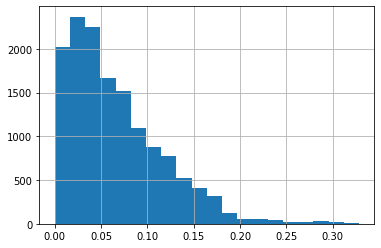

In [234]:
data["Item_Visibility"].hist(bins=20)

In [235]:
Q1 = data["Item_Visibility"].quantile(0.25)

In [236]:
Q3 = data["Item_Visibility"].quantile(0.75)

In [237]:
IQR = Q3 - Q1

In [238]:
fill_data = data.query('(@Q1 - 1.5*@IQR) <= Item_Visibility <= (@Q3 + 1.5*@IQR)')

In [239]:
fill_data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,19
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,9


In [240]:
fill_data.shape

(13943, 14)

In [241]:
data.shape

(14204, 14)

In [242]:
data = fill_data

In [243]:
data.shape

(13943, 14)

In [244]:
data["Item_Visibility_bins"] = pd.cut(data["Item_Visibility"], [0.000, 0.065, 0.13, 0.2], labels = ['Low Viz', 'Viz','High Viz'])

In [245]:
data["Item_Visibility_bins"].value_counts()

Low Viz     7363
Viz         4283
High Viz    1418
Name: Item_Visibility_bins, dtype: int64

In [246]:
data["Item_Visibility_bins"] = data["Item_Visibility_bins"].replace(np.nan, "Low Viz", regex=True)

In [247]:
data["Item_Fat_Content"] = data["Item_Fat_Content"].replace(["low fat", "LF"], "Low Fat")

In [248]:
data["Item_Fat_Content"] = data["Item_Fat_Content"].replace("reg", "Regular")

In [249]:
data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [250]:
le = LabelEncoder()

In [251]:
data["Item_Fat_Content"] = le.fit_transform(data["Item_Fat_Content"])

In [252]:
data["Item_Visibility_bins"] = le.fit_transform(data["Item_Visibility_bins"])

In [253]:
data["Outket_Size"] = le.fit_transform(data["Outlet_Size"])

In [254]:
data["Outlet_Location_Type"] = le.fit_transform(data["Outlet_Location_Type"])

In [255]:
data["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [256]:
dummy = pd.get_dummies(data["Outlet_Type"])
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [257]:
data["Item_Identifier"]

0        FDA15
1        DRC01
2        FDN15
3        FDX07
4        NCD19
         ...  
14199    FDB58
14200    FDD47
14201    NCO17
14202    FDJ26
14203    FDU37
Name: Item_Identifier, Length: 13943, dtype: object

In [258]:
data["Item_Identifier"].value_counts()

FDP21    10
FDN56    10
FDC14    10
NCL19    10
FDS03    10
         ..
NCL42     7
FDM52     7
FDZ60     7
FDM10     7
FDX49     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [259]:
data["Item_Type_Combined"] = data["Item_Identifier"].apply(lambda x: x[0:2])
data["Item_Type_Combined"] = data["Item_Type_Combined"].map({'FD': 'Food',
                                                            'NC': 'Non-Consumable',
                                                            'DR': 'Drinks'})

In [260]:
data["Item_Type_Combined"].value_counts()

Food              9991
Non-Consumable    2652
Drinks            1300
Name: Item_Type_Combined, dtype: int64

In [261]:
data.shape

(13943, 17)

In [262]:
data = pd.get_dummies(data, columns=["Item_Fat_Content", "Outlet_Location_Type", "Outlet_Size", "Outlet_Type", "Item_Type_Combined"])

In [263]:
data.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_Type                             object
Item_MRP                             float64
Outlet_Identifier                     object
Outlet_Establishment_Year              int64
Item_Outlet_Sales                    float64
source                                object
Outlet_Age                             int64
Item_Visibility_bins                   int32
Outket_Size                            int32
Item_Fat_Content_0                     uint8
Item_Fat_Content_1                     uint8
Outlet_Location_Type_0                 uint8
Outlet_Location_Type_1                 uint8
Outlet_Location_Type_2                 uint8
Outlet_Size_High                       uint8
Outlet_Size_Medium                     uint8
Outlet_Size_Small                      uint8
Outlet_Type_Grocery Store              uint8
Outlet_Type_Supermarket Type1          uint8
Outlet_Typ

In [264]:
import warnings
warnings.filterwarnings('ignore')

data.drop(["Item_Type", "Outlet_Establishment_Year"], axis=1, inplace=True)

train = data.loc[data["source"] == "train"]
test = data.loc[data["source"] == "test"]

test.drop(["Item_Outlet_Sales", "source"], axis=1, inplace=True)
train.drop(["source"], axis=1, inplace=True)

train.to_csv("train_modified.csv", index=False)
test.to_csv("test_modified.csv", index=False)

In [265]:
train2 = pd.read_csv("train_modified.csv")
test2 = pd.read_csv("test_modified.csv")

In [266]:
train2.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_MRP                             float64
Outlet_Identifier                     object
Item_Outlet_Sales                    float64
Outlet_Age                             int64
Item_Visibility_bins                   int64
Outket_Size                            int64
Item_Fat_Content_0                     int64
Item_Fat_Content_1                     int64
Outlet_Location_Type_0                 int64
Outlet_Location_Type_1                 int64
Outlet_Location_Type_2                 int64
Outlet_Size_High                       int64
Outlet_Size_Medium                     int64
Outlet_Size_Small                      int64
Outlet_Type_Grocery Store              int64
Outlet_Type_Supermarket Type1          int64
Outlet_Type_Supermarket Type2          int64
Outlet_Type_Supermarket Type3          int64
Item_Type_Combined_Drinks              int64
Item_Type_

In [267]:
X_train = train2.drop(["Item_Outlet_Sales", "Outlet_Identifier", "Item_Identifier"], axis=1)
y_train = train2.Item_Outlet_Sales

In [270]:
X_test = test2.drop(["Outlet_Identifier", "Item_Identifier"], axis=1)

In [271]:
X_test

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Visibility_bins,Outket_Size,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,20.750000,0.007565,107.8622,19,1,1,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
1,8.300000,0.038428,87.3198,11,1,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
2,14.600000,0.099575,241.7538,20,2,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
3,7.315000,0.015388,155.0340,11,1,1,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
4,12.792854,0.118599,234.2300,33,2,1,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,10.500000,0.013496,141.3154,21,1,2,0,1,1,0,...,0,0,1,0,1,0,0,0,1,0
5564,7.600000,0.142991,169.1448,9,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
5565,10.000000,0.073529,118.7440,16,2,1,1,0,0,1,...,0,1,0,0,1,0,0,0,0,1
5566,15.300000,0.000000,214.6218,11,3,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0


In [272]:
X_train.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Visibility_bins,Outket_Size,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,9.30,0.016047,249.8092,19,1,1,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
1,5.92,0.019278,48.2692,9,1,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0


In [273]:
y_train.head(2)

0    3735.1380
1     443.4228
Name: Item_Outlet_Sales, dtype: float64

In [274]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

In [275]:
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [276]:
lin = LinearRegression()

In [277]:
lin.fit(xtrain, ytrain)

LinearRegression()

In [279]:
print(lin.coef_)
lin.intercept_

[-1.93054423e+00 -3.47449893e+02  1.58788136e+01 -3.19310190e+01
 -4.64698319e+00 -2.56133134e+02 -1.55426303e+00  1.55426303e+00
  1.88969149e+02  4.83874237e+01 -2.37356573e+02  2.83839318e+02
 -3.11545503e+02  2.77061848e+01 -1.63452944e+03 -1.26820412e+02
 -3.48655405e+02  2.11000526e+03  9.06454503e+00  3.46403369e+01
 -4.37048820e+01]


1202.554350714846

In [280]:
predictions = lin.predict(xtest)
predictions

array([2077.92386202, 3704.93216108, 2961.28180591, ..., 3541.28725867,
       3464.78656382, 1249.59368407])

In [281]:
import math

In [282]:
print(math.sqrt(mean_squared_error(ytest, predictions)))

1126.2352692434754


In [283]:
y_sales_pred = lin.predict(X_test)
y_sales_pred

array([1788.81075495, 1593.90875193, 1845.79649796, ..., 1831.65421972,
       3605.8573969 , 1284.78769015])

In [284]:
test_predictions = pd.DataFrame({
    'Item_Identifier': test2['Item_Identifier'],
    'Outlet_Identifier': test2['Outlet_Identifier'],
    'Item_Outlet_Sales': y_sales_pred
}, columns=['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])

In [285]:
test_predictions

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1788.810755
1,FDW14,OUT017,1593.908752
2,NCN55,OUT010,1845.796498
3,FDQ58,OUT017,2675.927968
4,FDY38,OUT027,5134.091429
...,...,...,...
5563,FDB58,OUT046,2360.100059
5564,FDD47,OUT018,2419.143609
5565,NCO17,OUT045,1831.654220
5566,FDJ26,OUT017,3605.857397
